In [19]:
import pandas as pd # type: ignore
import tensorflow as tf # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import matplotlib.image as mpimg
import os

In [20]:
# Training Dataset
training = r"C:\Users\ishug\OneDrive\Desktop\Deep learning project\Catract Eye Prediction\train"
testing = r"C:\Users\ishug\OneDrive\Desktop\Deep learning project\Catract Eye Prediction\test"



In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    training,
    target_size=(64, 64),  # All images will be resized to 150x150
    batch_size=20,
    class_mode='binary'  # Since we use binary_crossentropy loss, we need binary labels
)

Found 491 images belonging to 2 classes.


In [25]:
len(train_generator)

25

In [31]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    testing,
    target_size=(64, 64),
    batch_size=20,
    class_mode='binary'
)

Found 121 images belonging to 2 classes.


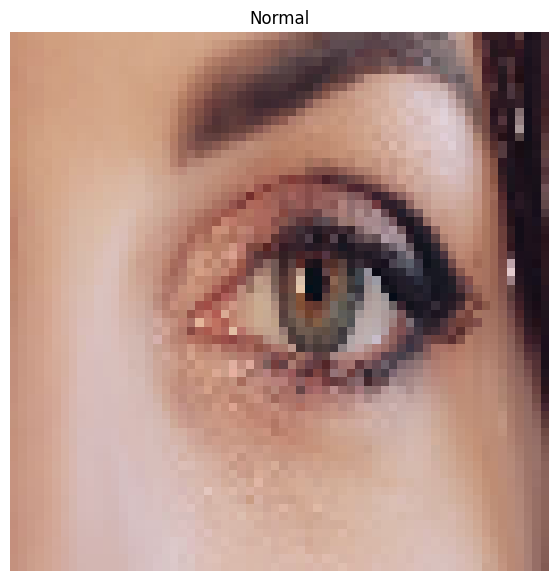

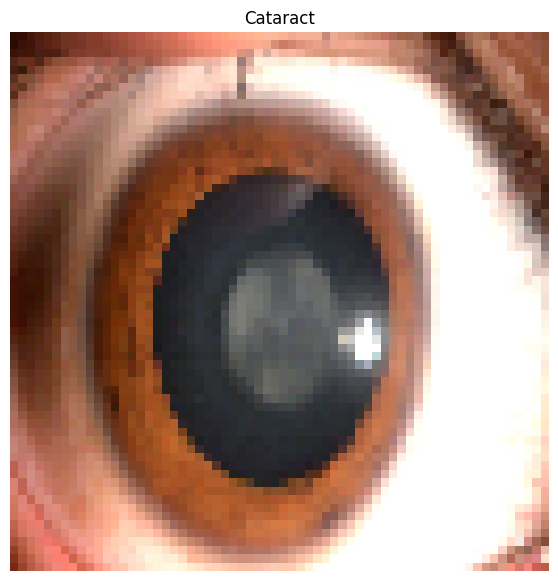

In [32]:
class_indices = train_generator.class_indices

classes = list(class_indices.keys())


cataract_index = class_indices['cataract']
normal_index = class_indices['normal']


cataract_image_found = False
normal_image_found = False

for images_batch, labels_batch in train_generator:
    for i in range(len(labels_batch)):
        if not cataract_image_found and labels_batch[i] == cataract_index:
            plt.figure(figsize=(7, 7))
            plt.imshow(images_batch[i])
            plt.title('Cataract')
            plt.axis('off')
            cataract_image_found = True
        elif not normal_image_found and labels_batch[i] == normal_index:
            plt.figure(figsize=(7, 7))
            plt.imshow(images_batch[i])
            plt.title('Normal')
            plt.axis('off')
            normal_image_found = True

    if cataract_image_found and normal_image_found:
        break

plt.show()

USING SIMPLE CNN

In [33]:
from tensorflow.keras import layers, models #type: ignore

In [34]:
#builing the convulational model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape=(64,64,3)))   # 32 is the number of filter, (3,3) filter size , activation function is relu because relu generally did not have vanishing gradient
model.add(layers.MaxPooling2D(2,2))                                        # (64,64,3) is the image is size with 3

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))



In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [36]:
model.add(layers.Flatten()) # flatten the layer so model able to take the input
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3)) # to reduce the overfitting
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation = 'sigmoid'))


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [38]:
model.compile(loss='binary_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
history = model.fit(
    train_generator, 
    batch_size = 32 ,
    verbose=2,
    epochs = 15,
    validation_data=test_generator,
)

Epoch 1/15
25/25 - 15s - loss: 0.6942 - accuracy: 0.5214 - val_loss: 0.6930 - val_accuracy: 0.4959 - 15s/epoch - 586ms/step
Epoch 2/15
25/25 - 13s - loss: 0.6937 - accuracy: 0.5173 - val_loss: 0.6911 - val_accuracy: 0.5124 - 13s/epoch - 514ms/step
Epoch 3/15
25/25 - 13s - loss: 0.6821 - accuracy: 0.5682 - val_loss: 0.6391 - val_accuracy: 0.7025 - 13s/epoch - 507ms/step
Epoch 4/15
25/25 - 13s - loss: 0.5634 - accuracy: 0.7413 - val_loss: 0.4220 - val_accuracy: 0.8264 - 13s/epoch - 501ms/step
Epoch 5/15
25/25 - 13s - loss: 0.4930 - accuracy: 0.7984 - val_loss: 0.5301 - val_accuracy: 0.7769 - 13s/epoch - 514ms/step
Epoch 6/15
25/25 - 16s - loss: 0.4138 - accuracy: 0.8452 - val_loss: 0.4305 - val_accuracy: 0.8678 - 16s/epoch - 621ms/step
Epoch 7/15
25/25 - 15s - loss: 0.4044 - accuracy: 0.8595 - val_loss: 0.3682 - val_accuracy: 0.8760 - 15s/epoch - 613ms/step
Epoch 8/15
25/25 - 14s - loss: 0.3567 - accuracy: 0.8534 - val_loss: 0.3619 - val_accuracy: 0.8760 - 14s/epoch - 579ms/step
Epoch 9/

In [42]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Training Accuracy:", train_accuracy[-1] * 100)
print("Validation Accuracy:", val_accuracy[-1] * 100)

Training Accuracy: 93.4826910495758
Validation Accuracy: 95.04132270812988


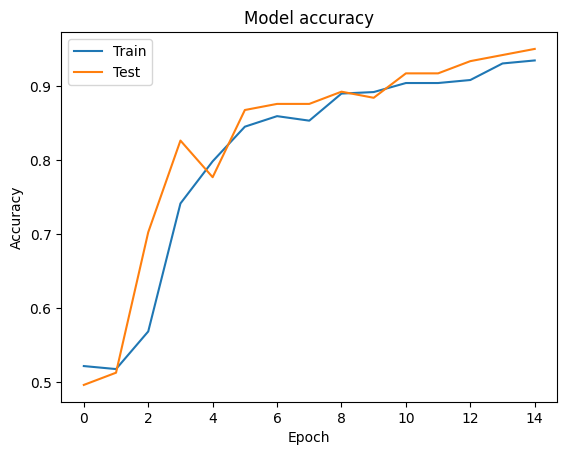


# Evaluate on test data
6/6 [==============================] - 4s 458ms/step - loss: 0.2028 - accuracy: 0.9500
test loss, test acc: [0.20284448564052582, 0.949999988079071]


In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


print('\n# Evaluate on test data')
results = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('test loss, test acc:', results)

USING ALEXNET

In [46]:
alex_net = tf.keras.models.Sequential([
    layers.Conv2D(96, 11, strides=4, padding='same', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(256, 5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])


In [47]:
alex_net.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [50]:
history_alex_net = alex_net.fit(train_generator, 
    epochs = 15,
    validation_data=test_generator)

Epoch 1/15
25/25 [==============================] - 14s 577ms/step - loss: 0.1860 - accuracy: 0.9348 - val_loss: 0.2809 - val_accuracy: 0.8926
Epoch 2/15
25/25 [==============================] - 13s 538ms/step - loss: 0.2531 - accuracy: 0.9145 - val_loss: 0.4603 - val_accuracy: 0.8678
Epoch 3/15
25/25 [==============================] - 14s 566ms/step - loss: 0.1141 - accuracy: 0.9552 - val_loss: 0.4097 - val_accuracy: 0.8347
Epoch 4/15
25/25 [==============================] - 13s 505ms/step - loss: 0.0698 - accuracy: 0.9837 - val_loss: 0.6027 - val_accuracy: 0.8430
Epoch 5/15
25/25 [==============================] - 14s 537ms/step - loss: 0.0486 - accuracy: 0.9878 - val_loss: 0.1814 - val_accuracy: 0.9339
Epoch 6/15
25/25 [==============================] - 13s 503ms/step - loss: 0.0799 - accuracy: 0.9715 - val_loss: 0.2239 - val_accuracy: 0.9339
Epoch 7/15
25/25 [==============================] - 14s 536ms/step - loss: 0.1017 - accuracy: 0.9613 - val_loss: 0.6550 - val_accuracy: 0.8595

In [51]:
train_accuracy_alex_net = history_alex_net.history['accuracy']
val_accuracy_alex_net = history_alex_net.history['val_accuracy']

print("Training Accuracy:", train_accuracy_alex_net[-1] * 100)
print("Validation Accuracy:", val_accuracy_alex_net[-1] * 100)

Training Accuracy: 98.98167252540588
Validation Accuracy: 91.73553586006165


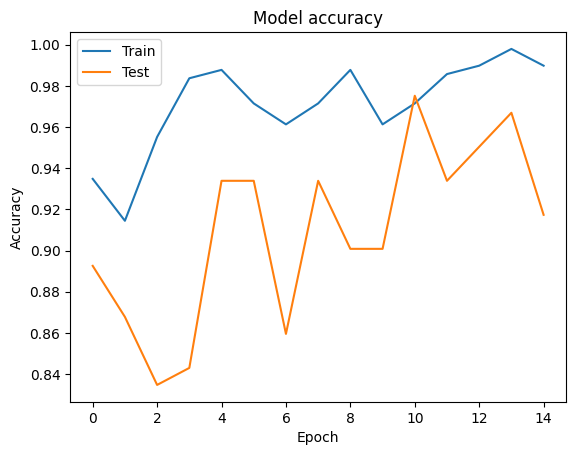


# Evaluate on test data
6/6 [==============================] - 3s 466ms/step - loss: 0.2029 - accuracy: 0.9500
test loss, test acc: [0.20292963087558746, 0.949999988079071]


In [52]:
plt.plot(history_alex_net.history['accuracy'])
plt.plot(history_alex_net.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


print('\n# Evaluate on test data')
results = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('test loss, test acc:', results)

In [53]:
#saving the CNN model 
model.save("Cataract_eye_using_cnn.h5")

In [54]:
#saving the alexNet model
model.save("Cataract_eye_using_AlexNet.h5") 

Testing for the Custome Input

In [64]:
def convert_into_pixel(img):
  img = img.resize((64,64))
  img_pixel = np.array(img)

  img_pixel = img_pixel / 255

  return img_pixel

#user input
img  = Image.open("image_286.png")

converted_img = convert_into_pixel(img)

prediction =  model.predict(np.expand_dims(converted_img,axis = 0))
print(prediction)

if prediction[0] > 0.5:
    print("The model predicts this image as 'cataract'")
else:
    print("The model predicts this image as 'normal'")



1/1 [==============================] - 0s 43ms/step
[[0.00184099]]
The model predicts this image as 'normal'


In [65]:
from tensorflow.keras.preprocessing import image #type: ignore
img_path = 'image_286.png'  # Replace with your image path
img = image.load_img(img_path, target_size=(64, 64))

# Preprocess the image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # Remember that the model was trained on inputs that were preprocessed in the same way

# Predict the class of the image
predictions = alex_net.predict(img_tensor)

if predictions[0] > 0.5:
    print("The model predicts this image as 'cataract'")
else:
    print("The model predicts this image as 'normal'")


1/1 [==============================] - 0s 26ms/step
The model predicts this image as 'normal'
